# How to Prepare TopoFlow Input Files

### SHOULD ALSO CREATE THE POP COUNT GRID in "__misc" DIR !!

### Table of Contents

1.  <a href="#intro_B">Introduction</a> <br>
2.  <a href="#data_B">Download Source Data for Region of Interest</a> <br>
3.  <a href="#choose_B">Set the site_prefix, case_prefix and Common Info</a> <br>
4.  <a href="#dirs_B">Create Some Directories in Your Home Directory</a> <br>
5.  <a href="#rain_B">Set the Rainfall Product and Datetime Info</a> <br>
6.  <a href="#test_rain_B">Write a Simple, Uniform "rainrates file" to "met" Directory</a> <br>
7.  <a href="#define_B">Define Information for a Specific Basin of Interest</a> <br>
9.  <a href="#cfg_B">Create CFG Files from CFG Templates</a> <br>
10. <a href="#copy_outlets_B">Copy an "outlets file" of Grid Cells to Monitor</a> <br>
11. <a href="#import_utils_B">Import Some TopoFlow Utilities</a> <br>
12. <a href="#clip_dem_B">Clip a Source DEM to a Bounding Box and Resample</a> <br>
13. <a href="#read_dem_tif_B">Read Clipped DEM from a GeoTIFF File</a> <br>
14. <a href="#read_dem_rtg_B">Read DEM from an RTG File (with RTI File)</a> <br>
15. <a href="#read_dem_nc_B">Read DEM from a netCDF File</a> <br>
16. <a href="#smooth_dem_B">Create a DEM with Smoother Slopes</a> <br>
17. <a href="#non_neg_B">Option to Replace Negative Values in DEM</a> <br>
18. <a href="#fill_pits_B">Fill Depressions in the DEM and Save</a> <br>
19. <a href="#d8_flow_B">Compute a D8 Flow Direction Grid</a> <br>
20. <a href="#d8_area_B">Save the D8 Total Contributing Area (TCA) Grid</a> <br>
21. <a href="#d8_slope_B">Compute the D8 Slope Grid</a> <br>
22. <a href="#d8_aspect_B">Compute the D8 Aspect Grid</a> <br>
23. <a href="#chan_width_B">Compute an Estimated Channel Width Grid</a> <br>
24. <a href="#chan_manning_B">Compute an Estimated "Manning's n" Grid</a> <br>
25. <a href="#chan_sinu_B">Compute an Estimated Channel Sinuosity Grid</a> <br>
26. <a href="#bankfull_d_B">Compute an Estimated Bankfull Depth Grid</a> <br>
27. <a href="#init_depth_B">Compute an Estimated Initial Channel Water Depth Grid</a> <br>
28. <a href="#soil_hydro_B">Create Soil Hydraulic Property Grids (via Pedotransfer) </a> <br>
29. <a href="#TotPrecip_B">Create a Space-time Total Precip Rate Grid Stack</a> <br>
30. <a href="#GLDAS_vars_B">Create Space-time Grid Stacks for GLDAS Noah-LSM Variables </a> <br>
31. <a href="#RH_B">Create Space-time Grid Stack for Relative Humidity </a> <br>
32. <a href="#convert_units_B">Convert Units of an Existing Space-time Grid Stack </a> <br>
33. <a href="#setup_B">Appendix 1: Installing TopoFlow in a conda Environment</a>

<!-- Hyperlink IDs must be unique to work in Jupyter Lab when
there are multiple notebooks open. Hence the trailing letter. -->

## Introduction  <a id="intro_B"></a> 

This Jupyter notebook demonstrates how to use a collection of TopoFlow utilities to create required input files for the TopoFlow hydrologic model.  Before you can run the code in this notebook, you will need to install the TopoFlow 3.6 Python package. This notebook uses numerous utilities from the TopoFlow 3.6 package, in <b>topoflow/utils</b>.  Detailed instructions and background information for how to install TopoFlow in a conda environment are given in Appendix 1: Installing TopoFlow in a conda Environment.

This notebook addresses the important issue of <b>portability</b>.  By simply specifying a geographic bounding box and a few other bits of information for <b>any river basin in Ethiopia</b> in the first few cells, you can create all of the input files that are required by TopoFlow (except space-time meteorological grids, like rainfall rates, as discussed near the end.)  With a few other very minor changes, this notebook could create input files required by TopoFlow for <b>any river basin on Earth</b>.  This is because it uses data sets that are available <b>globally</b>, such as the
[<b>MERIT DEM</b>](http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_DEM/) and the
[<b>ISRIC SoilGrids</b>](https://www.isric.org/explore/soilgrids) database
[<b>and services</b>](https://soilgrids.org/).

This notebook currently assumes that the user has access to a shared Dropbox folder for the World Modelers MINT Project called <b>MINT</b>, and it copies some necessary files from there at the beginning.  However, these can be provided in a zip file upon request. (Scott.Peckham@colorado.edu).

This notebook is for TopoFlow pre-processing (preparation of input files).  There are several other notebooks, including TopoFlow_Getting_Started.ipynb and TopoFlow_Visualization_v2.ipynb, which address other issues.

<b>Note</b> Once you have set up some choices in the first few cells, it is possible to choose
Run > Run All Cells.

## Download Source Data for Region of Interest <a id="data_B"></a>

This notebook has been designed to create a set of TopoFlow input files for any river basin on Earth.  It assumes that you have the necessary source data files for a larger region that contains the basin of interest.  For the DEM, this could be a global DEM, or a DEM for a particular country, for example.  Source data files will be clipped to the river basin's geographic bounding box and also resampled to the desired spatial resolution.  The
[<b>MERIT DEM</b>](http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_DEM/)
tiles may be mosaicked and/or clipped to create the source DEM.
It is also assumed that you have
[<b>ISRIC SoilGrids</b>](https://soilgrids.org/)
for a region that contains the basin of interest.  You must first download these files to your computer and then edit the following cell to provide the path information.  The original SoilGrid data is from 2017 and the latest is from 2020.
The 2017 data is available for the globe, aggregated to 1km spatial resolution, and is usually sufficient. That data is available here:
[<b>ISRIC SoilGrids 2017 1km</b>](https://files.isric.org/soilgrids/former/2017-03-10/aggregated/1km/).
For TopoFlow, you need the files that begin with these 7 prefixes, for all soil layers:

BLDFIE = Bulk density [kg / m3] <br>
BDRICM = Absolute depth to bedrock [cm] <br>
BDTICM = (Total?) depth to bedrock [cm] <br>
CLYPPT = Mass fraction of clay [%] <br>
ORCDRC = Soil organic carbon content (fine earth fraction)  [g / kg] <br>
SLTPPT = Mass fraction of silt [%] <br>
SNDPPT = Mass fraction of sand [%] <br>

The 2020 data is available here:
    [<b>ISRIC SoilGrids 2020</b>](https://files.isric.org/soilgrids/latest/data/).
You will also need to obtain sample CFG files for TopoFlow, as well as sample
basin outlet files. (GIVE GitHub LINK HERE)



In [1]:
# Change these directories as necessary

import os, os.path

# This is your home directory and it is used throughout this notebook.
home_dir = os.path.expanduser("~")

# It is better to use a MERIT DEM with floating-point elevations.
# Go to this URL:  http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_DEM/
# to download the tile listed here (5x5 degrees).
src_dem_dir  = home_dir + '/DEMs/MERIT_Tiles/GeoTIFF/'
src_dem      = 'n35w125_dem.tif'

# This DEM has a data type of INTEGER (int16)
# src_dem_dir  = home_dir + '/DEMs/HydroSHEDS/Sagehen/'
# src_dem      = 'Sagehen_HydroSHEDS_DEM.tif'

tf_data_dir      = home_dir + '/TF_Data/'
src_soil_dir     = tf_data_dir + 'ISRIC_SoilGrids/__Global_2017_1km/'
cfg_template_dir = tf_data_dir + '_Test1/cfg_templates/'
src_outlet_dir   = tf_data_dir + '_Test1/outlet_files/'

print( 'Home directory =', home_dir )
print( 'Source DEM directory   =', src_dem_dir )
print( 'Source Soil directory  =', src_soil_dir )
print( 'CFG template directory =', cfg_template_dir )
print()

Home directory = /Users/peckhams
Source DEM directory   = /Users/peckhams/DEMs/MERIT_Tiles/GeoTIFF/
Source Soil directory  = /Users/peckhams/TF_Data/ISRIC_SoilGrids/__Global_2017_1km/
CFG template directory = /Users/peckhams/TF_Data/_Test1/cfg_templates/



## Set the site_prefix, case_prefix and Common Info  <a id="choose_B"></a> 

In the next cell, uncomment the site_prefix for the river basin that you want to create input files for.  This notebook has been pre-configured to prepare data for several river basins in Africa, but if you add a cell in the appropriate section below, similar to the ones for the pre-configured basins, you can use this notebook to create all of the TopoFlow input files for <b>any</b> river basin on Earth.

In [2]:
site_prefix = 'Sagehen'

#--------------------------------------------------------
# For now, keep these the same for all the river basins
#--------------------------------------------------------
case_prefix  = 'Test1'
channel_width_power = 0.5
max_sinuosity   = 1.2    # [m/m]  ###########################
min_manning_n   = 0.03   # [m / s^(1/3)]
max_manning_n   = 0.2    # [m / s^(1/3)]
bankfull_depth_power = 0.4
bank_angle = 30.0   # [degrees]
DRAINS_TO_OCEAN = False   # (this is the default)


## Create Some Directories in Your Home Directory  <a id="dirs_B"></a>


In [3]:
import glob
import shutil

## test_dir  = home_dir + '/TF_Tests/'     ###########
test_dir  = home_dir + '/basins/'
basin_dir = test_dir + site_prefix + '/'
topo_dir  = basin_dir + '__topo/'
soil_dir  = basin_dir + '__soil/'
met_dir   = basin_dir + '__met/'
misc_dir  = basin_dir + '__misc/'
## cfg_dir   = basin_dir + 'Test1_cfg/'  # (moved down)

if not(os.path.exists( test_dir )):  os.mkdir( test_dir )
if not(os.path.exists( basin_dir )): os.mkdir( basin_dir )
if not(os.path.exists( topo_dir )):  os.mkdir( topo_dir )
if not(os.path.exists( soil_dir )):  os.mkdir( soil_dir )
if not(os.path.exists( met_dir )):   os.mkdir( met_dir )
if not(os.path.exists( misc_dir )):  os.mkdir( misc_dir )
## if not(os.path.exists( cfg_dir )):   os.mkdir( cfg_dir )   # (moved down)

print( 'Home directory  =', home_dir )
print( 'Basin directory =', basin_dir )


Home directory  = /Users/peckhams
Basin directory = /Users/peckhams/basins/Sagehen/


## Set the Rainfall Product & Datetime Info <a id="rain_B"></a>
Note that the number of minutes in a regular year = 60 * 24 * 365 = 525600, and the number of minutes in a leap year = 60 * 24 * 366 = 527040. The year 2016 is a leap year, so the number of minutes in 2015-10-01 to 2018-10-01 = 2*(525600) + 527040 = = 1578240. (Note: 525600 * 3 = 1576800).

In [4]:
GLDAS   = True
CHIRPS  = False
CHIRPS2 = False
GPM     = False

start_date_str  = '2016-10-01' # changed for CHIRPS2 below
end_date_str    = '2017-09-30'
date_range_str  = '2016-10_to_2017-09'
extension       = '_' + date_range_str + '.rts'
GMT_offset_str  = '-8'  # Pacific Time
start_month_str = 'October'
start_day_str   = '1'
T_stop_str      = '525600'  # [minutes]  See note above.

if (GLDAS):
    # src_rain_dir must contain only "nc4" files for specified time range
    print('Will use GLDAS rainfall product.')
    src_rain_dir   = tf_data_dir + 'GLDAS_Multi_Sagehen_2016-10_to_2017-09/16-Params/'
    rain_rts_file  = 'GLDAS_Rain_'  + site_prefix + extension
    temp_rts_file  = 'GLDAS_Temp_'  + site_prefix + extension
    hsnow_rts_file = 'GLDAS_HSnow_' + site_prefix + extension
    met_dt_str     = '10800.0'  # [secs]  60 * 60 * 3 (secs in 3 hrs)
    rain_type_str  = 'GLDAS'

rain_rts_path = met_dir + rain_rts_file  #################

##############################################################
# CFG directory name now includes "date_range" & "rain_type"
##############################################################
case_info_str = date_range_str + '_' + rain_type_str
cfg_dir = basin_dir + 'Test1_' + case_info_str + '_cfg/'
if not(os.path.exists( cfg_dir )):   os.mkdir( cfg_dir )
print( 'CFG directory =', cfg_dir )
print()


Will use GLDAS rainfall product.
CFG directory = /Users/peckhams/basins/Sagehen/Test1_2016-10_to_2017-09_GLDAS_cfg/



## Write a Simple, Uniform "rainrates file" to "met" Directory  <a id="test_rain_B"></a>

In this step we create a text file with a simple time series of spatially uniform rainrates for testing purposes.  Near the end of this notebook, we also create space-time rainfall grid stacks (e.g. CHIRPS).


In [5]:
test_rain_file = met_dir + 'Test1_rain_rates.txt'
test_rain_unit = open( test_rain_file, 'w')
for k in range(5):
    test_rain_unit.write('3.0\n')
for k in range(15):
    test_rain_unit.write('10.0\n')
for k in range(5):
    test_rain_unit.write('3.0\n')
test_rain_unit.close()

## Define Information for a Specific Basin of Interest  <a id="define_B"></a> 

TopoFlow uses a <b>site_prefix</b> for all of the filenames in a data set that pertain to the geographic location (the "site").  These files describe static properties of the location, such as topography and soil.  The default site prefix in this notebook is <b>Baro-Gam_60sec</b>.

Topoflow uses a <b>case_prefix</b> for all of the filenames in a data set that describe a particular model scenario (the "case" under consideration).  These files describe things that can change from one model run to the next for the same site.  The default case prefix in this notebook is <b>Test1</b>.  Note that component CFG filenames always start with the case prefix.

By simply changing the information in this next code block, this notebook can generate TopoFlow input files for any river basin in Ethiopia.  However, please heed the <b>Important Warning</b> below.

out_bounds = Geographic bounding box for the chosen river basin<br>
out_xres_sec = the spatial grid cell xsize to use, in arcseconds<br>
out_yres_sec = the spatial grid cell ysize to use, in arcseconds<br>

### Important Warning !!

Some of the input grid files generated by this notebook are computed using empirical, power-law estimates, based on a grid of <b>total contributing area</b> (TCA).

For these, it is necessary -- <b>at a minimum</b>  -- to know the values of a few key variables at the basin outlet.  These must be determined from the literature or other data sets.  These variables that are specific to a particular river basin have been collected <b>in the next code block</b>.

If these are not set to reasonable values, the resulting predictions will be meaningless.

### Use info for Sagehen Creek?

In [5]:
if (site_prefix == 'Sagehen'):

    # Set the geographic bounding box and the grid cell size that
    # will be used for the TopoFlow model run, where
    #    Bounds = [ minlon, minlat, maxlon, maxlat ]
    # The bounding box MUST contain the entire watershed polygon.
    # Used this tool to convert the bounding box coordinates from Sagehen to decimal: https://www.fcc.gov/media/radio/dms-decimal
    
    # Lauren's original info
    # out_xres_sec = 30.0    # [arcseconds] ## 1 km to match NWM
    # out_yres_sec = 30.0    # [arcseconds] ## 1 km to match NWM
    # out_bounds = [ -120.4575, 39.319167, -120.083611, 39.533889] ## decimal degrees?

    # Based on Lauren's outlet, these outbounds are tighter & higher-res
    out_xres_sec = 10.0    # [arcseconds]
    out_yres_sec = 10.0    # [arcseconds]
    out_bounds = [ -120.3283, 39.3880, -120.1950, 39.4714]
    
    max_river_width = 10.38  # [meters]  from Google Earth (best guess) ## at the gauge?
    A_out_km2 = 27.19488  # total contributing area at basin outlet [km2]
    Qbase_out = 40.0     # estimated baseflow discharge at basin outlet [m^3 / s] ## at what point in time?
    max_bankfull_depth = 0.61   # [meters]    # rough estimate ## at the gauge?


## Copy a Set of CFG files into New Basin Directory  <a id="copy_cfg_B"></a>

Copy a set of default "CFG template" files from "cfg_template_dir" to "cfg_dir".  Settings that can currently be changed in the next block of this notebook are wrapped in "double curly brackets", e.g. "{{site_prefix}}".

In [80]:
os.chdir( cfg_template_dir )
cfg_file_list = sorted( glob.glob( '*.cfg' ) )

os.chdir( cfg_dir )
for cfg_file in cfg_file_list:
    shutil.copyfile( cfg_template_dir + cfg_file, cfg_file)

# Copy the default "provider_file"
provider_file = case_prefix + '_providers.txt'
shutil.copyfile( cfg_template_dir + provider_file, provider_file )

'Test1_providers.txt'

## Create CFG Files from CFG Templates  <a id="cfg_B"></a>

In [81]:
from topoflow.utils import cfg_templates as ct

chan_dt_str = '200.0'  # [secs]  # (try larger values later)
# chan_dt_str = '300.0'  # [secs]
# if (out_xres_sec == 120.0):
#     chan_dt_str = '900.0' # [secs]
# elif (out_xres_sec == 60.0):
#    chan_dt_str = '300.0' # [secs]
# else:
#    chan_dt_str = '300.0' # [secs]

# Create new path_info CFG file
d1 = '~/basins/' + site_prefix + '/'
d2 = '~/output/'
cfg_template = cfg_template_dir + case_prefix + '_path_info.cfg'
cfg_file     = cfg_dir + case_prefix + '_path_info.cfg'
vars = ['in_directory', 'out_directory', 'site_prefix', 'case_prefix' ]
vals = [ d1, d2, site_prefix, case_prefix ]
ct.make_new_cfg_file( vars, vals, cfg_template, cfg_file )

# Create new time_info CFG file
cfg_template = cfg_template_dir + case_prefix + '_time_info.cfg'
cfg_file     = cfg_dir + case_prefix + '_time_info.cfg'
vars = ['start_date', 'start_time', 'end_date', 'end_time' ]
vals = [ start_date_str, '  00:00:00', end_date_str, '  00:00:00']
ct.make_new_cfg_file( vars, vals, cfg_template, cfg_file )

# Create new topoflow CFG file
compute_stat_str = '0'
if (CHIRPS2):
    compute_stat_str = '1'  #######################
cfg_template = cfg_template_dir + case_prefix + '_topoflow.cfg'
cfg_file     = cfg_dir + case_prefix + '_topoflow.cfg'
vars = ['dt', 'T_stop_model', 'COMPUTE_STAT_GRIDS' ]
vals = [chan_dt_str, T_stop_str, compute_stat_str]
ct.make_new_cfg_file( vars, vals, cfg_template, cfg_file )

# Create new meteorology CFG file
# GMT Offset is 3 for Ethiopia & Kenya
cfg_template = cfg_template_dir + case_prefix + '_meteorology.cfg'
cfg_file     = cfg_dir + case_prefix + '_meteorology.cfg'
vars = ['dt', 'P_type', 'P', 'GMT_offset', 'start_month', 'start_day',
        'start_hour', 'save_grid_dt', 'save_pixels_dt' ]
vals = [met_dt_str, 'Grid_Sequence', rain_rts_file,
        GMT_offset_str, start_month_str, start_day_str, '0.0', 
        met_dt_str, met_dt_str] 
ct.make_new_cfg_file( vars, vals, cfg_template, cfg_file )

# Create new channels_kinematic_wave CFG file
cfg_template = cfg_template_dir + case_prefix + '_channels_kinematic_wave.cfg'
cfg_file     = cfg_dir + case_prefix + '_channels_kinematic_wave.cfg'
vars = ['dt', 'FLOOD_OPTION', 'ATTENUATE', 'save_grid_dt', 'save_pixels_dt' ]
vals = [chan_dt_str, '1', '0', met_dt_str, met_dt_str] 
ct.make_new_cfg_file( vars, vals, cfg_template, cfg_file )

# Create new channels_diffusive_wave CFG file
cfg_template = cfg_template_dir + case_prefix + '_channels_diffusive_wave.cfg'
cfg_file     = cfg_dir + case_prefix + '_channels_diffusive_wave.cfg'
vars = ['dt', 'FLOOD_OPTION', 'ATTENUATE', 'save_grid_dt', 'save_pixels_dt' ]
vals = [chan_dt_str, '1', '0', met_dt_str, met_dt_str] 
ct.make_new_cfg_file( vars, vals, cfg_template, cfg_file )


## Copy an "outlets file" of Grid Cells to Monitor   <a id="copy_outlets_B"></a>

In TopoFlow component CFG files, flags can be set to tell TopoFlow to write values of chosen gridded variables to a file, to create a <b>grid stack</b>, indexed by time.  Grids are saved at a time interval set by <b>save_grid_dt</b>.

Other flags in a CFG file can be set to tell TopoFlow to write values of chosen gridded variables to a file, but only at a specified set of grid cells.  These "monitored grid cells" or "virtual gauges" are set in an <b> outlets file</b> named <b>[case_prefix]_outlets.txt</b>.  It is a simple, multi-column text file, like this:
<pre> <span class="inner-pre" style="font-size:11px">
------------------------------------------------------------
 Monitored Grid Cell (Outlet) Information
-------------------------------------------------------------------------------------
    Column       Row     Area [km^2]      Relief [m]      Lon [deg]     Lat [deg]
-------------------------------------------------------------------------------------
        4         79        24647.3         2433.62       34.296250     8.1787500
       14         76        24011.0         2425.90       34.462917     8.2287500
       29         79        22972.0         2393.16       34.712917     8.1787500
       48         59          507.3         1434.04       35.029583     8.5120833
</span> </pre>
It is not necessary for the Area and Relief columns to contain valid values (they are for reference, but are unused).  However, the column, row, longitude and latitude of each grid cell to be monitored must be specified.  They must match columns and rows in the DEM that is being used for the model run.  Creating an outlets file therefore requires a <b>human in the loop</b>, using interactive GIS (Geographic Information System) software and making intelligent choices.  It cannot be automated.

Here we just copy an existing outlets file for one of the 6 Ethiopian basins.

In [82]:
os.chdir( cfg_dir )

outlets_dir = src_outlet_dir + site_prefix + '/'
outlet_file = case_prefix + '_outlets.txt'
outlet_path = outlets_dir + outlet_file

if (os.path.exists( outlet_path )):
    shutil.copyfile( outlet_path, outlet_file)
else:
    print('WARNING: No outlets file found for: ' + site_prefix)
    print('         You will need to create one manually.')
    print()


         You will need to create one manually.



## Import Some TopoFlow Utilities  <a id="import_utils_B"></a>

In [6]:
from topoflow.utils import regrid
from topoflow.utils import import_grid
from topoflow.utils import fill_pits
from topoflow.utils import rtg_files
from topoflow.utils import rti_files
from topoflow.utils import parameterize
from topoflow.utils import init_depth
from topoflow.utils import pedotransfer
from topoflow.utils import new_slopes

from topoflow.components import d8_global
from topoflow.components import smooth_DEM

Importing TopoFlow 3.6 package modules:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
 


## Clip a Source DEM to a Bounding Box and Resample  <a id="clip_dem_B"></a>

Here, we use the TopoFlow <b>regrid</b> utility to <b>clip</b> a DEM for the entire country of Ethiopia to the geographic bounding box for a particular river basin in Ethiopia.  This utility uses the gdal.warp() function in the GDAL Python package.  For this example, we use the Baro River basin which lies mostly in the Oromia region but drains past the town of Gambella into the Gambella region.

At the same time, we <b>resample</b> (via spatial bilinear interpolation) the resulting DEM to a different, coarser spatial resolution.  The source DEM has a grid cell size of 3 arcseconds (roughly 90 meters), while the new DEM has a grid cell size of 60 arcseconds (roughly 1800 meters).  Both the source DEM and new DEM are stored in GeoTIFF format.  Resampling typically causes the bounding box to change slightly.

In [84]:
### in_nodata = ????
### out_nodata = -9999.0

os.chdir( topo_dir )
in_file  = src_dem_dir + src_dem
out_file = site_prefix + '_rawDEM.tif'

regrid.regrid_geotiff(in_file=in_file, out_file=out_file, 
                   out_bounds=out_bounds,
                   out_xres_sec=out_xres_sec, out_yres_sec=out_yres_sec,
                   ### in_nodata=None, out_nodata=None, 
                   RESAMPLE_ALGO='bilinear', REPORT=True)

Input grid file:
   /Users/peckhams/DEMs/MERIT_Tiles/GeoTIFF/n35w125_dem.tif
   ncols  = 6000
   nrows  = 6000
   xres   = 3.0  [arcsecs]
   yres   = 3.0  [arcsecs]
   bounds = [-125.00041666666667, 34.999583333333334, -120.00041666666667, 39.999583333333334]
   dtype  = float32
   nodata = -9999.0
   gmin   = -9999.0
   gmax   = 3129.0557

Output grid file:
   Sagehen_rawDEM.tif
   ncols  = 48
   nrows  = 30
   xres   = 10.0  [arcsecs]
   yres   = 10.0  [arcsecs]
   bounds = [-120.3283, 39.38806666666667, -120.19496666666666, 39.4714]
   dtype  = float32
   nodata = -9999.0
   gmin   = 1788.235
   gmax   = 2628.7993
Finished regridding.



## Read Clipped DEM from a GeoTIFF File  <a id="read_dem_tif_B"></a>

Here we import a DEM in GeoTIFF format.  Note that NetCDF (.nc) and RiverTools Grid (RTG) formats can also be imported.

Most of the TopoFlow utilities use grids saved in the RiverTools Grid (RTG) format, which is a generic, binary, row-major format.  Georeferencing information for the grid is stored in a small, separate text file in RiverTools Info (RTI) format.  When the rti_file argument is specified, georeferencing information is also saved in the RTI file format for later use.

In [85]:
os.chdir( topo_dir )

tif_file = site_prefix + '_rawDEM.tif'
rti_file = site_prefix + '.rti'
DEM = import_grid.read_from_geotiff( tif_file, REPORT=True, rti_file=rti_file)

grid_info = rti_files.read_info( rti_file )

Finished reading file:
Sagehen_rawDEM.tif
Grid info from GDAL:
ncols, nrows = 48 , 30
xres, yres   = 0.002777777777777778 , 0.002777777777777778
----------------------------------
ulx, uly     = -120.3283 , 39.4714
lrx, lry     = -120.19496666666666 , 39.38806666666667
xskew, yskew = 0.0 , 0.0
----------------------------------
grid.dtype  = float32
grid.min()  = 1788.235
grid.max()  = 2628.7993

Finished making RTI file for:
  Sagehen_rawDEM.tif



## Read DEM from an RTG File (with RTI file)  <a id="read_dem_rtg_B"></a>

<b>Note:</b> This shows how to alternately import a DEM in RTG format, but is commented out for now.

In [21]:
# os.chdir( topo_dir )
# rtg_file = site_prefix + '_rawDEM.rtg'
# DEM = import_grid.read_from_rtg( rtg_file, REPORT=True)
# grid_info = rti_files.read_info( rtg_file )

## Read DEM from a netCDF File  <a id="read_dem_nc_B"></a>

<b>Note:</b> This shows how to alternately import a DEM in netCDF format, but is commented out for now.

In [14]:
# os.chdir( topo_dir )
# nc_file = site_prefix + '_rawDEM.nc'
# DEM = import_grid.read_from_netcdf( nc_file, REPORT=True)

## Create a DEM with Smoother Slopes  <a id="smooth_dem_B"></a>

<b>Note:</b> This step is optional and has been commented out for now.

For so-called <b>mature</b> landscapes this "profile smoothing" algorithm works well, and results in a DEM with smoothly decreasing, nonzero channel slopes everywhere.  However, the landscape of the Baro River basin is not a good candidate because it is not mature.

In [15]:
# os.chdir( topo_dir )
# c = smooth_DEM.DEM_smoother()
# c.DEBUG = True
# case_prefix = 'Test1'
# cfg_file = case_prefix + '_dem_smoother.cfg'
# c.initialize( cfg_file=cfg_file, mode='driver')
# c.update()

## Option to Replace Negative Values in DEM <a id="non_neg_B"></a>

This helps to prevent problems that can occur for DEMs where the main river basin drains to the ocean.  But some DEMs have valid negative elevations.


In [16]:
# NOTE: Set to 0 vs. "0.0" so that data_type is not changed from INTEGER to FLOAT.
if (DRAINS_TO_OCEAN):
    DEM[ DEM < 0 ] = 0

## Fill Depressions in the DEM and Save <a id="fill_pits_B"></a>

This step is necessary to make the DEM <b>hydrologically sound</b>.

In [86]:
# data_type = 'FLOAT'
# shp = DEM.shape
# nrows = shp[0]
# ncols = shp[1]

os.chdir( topo_dir )
data_type = grid_info.data_type   # e.g. "INTEGER" or "FLOAT"
print('data_type =', data_type)
ncols = grid_info.ncols
nrows = grid_info.nrows

if (site_prefix == 'Sagehen'):
    #-----------------------------------------------------------------
    # Note: The Awash River basin terminates in Lake Abhe (or Abbe)
    #       at an elevation near 240 m.  The "fill_pits" routine
    #       can handle this situation if we set the value of a grid
    #       cell in Lake Abhe to the "closed-basin code": -32000.
    #       Otherwise, the river is routed incorrectly to ocean.
    #-----------------------------------------------------------------
    pass
    ## DEM[13,42] = -32000

# print('DEM.dtype (before) =', DEM.dtype)
fill_pits.fill_pits( DEM, data_type, ncols, nrows, 
                     SILENT=False)
# print('DEM.dtype (after) =', DEM.dtype)
# print('grid_info.data_type =', grid_info.data_type)

new_DEM_file = site_prefix + '_DEM.rtg'
rtg_files.write_grid( DEM, new_DEM_file, grid_info, RTG_type=data_type, SILENT=False)  ##########


data_type = FLOAT
Number of nodata and NaN values = 0
Finished initializing "closed" array.
 
Putting boundary pixels on heap...
Number of pixels on heap = 152
Finished with heap insertion.
 
n_closed = 0 of 1440
Total pixels   = 1440
Raised  pixels = 37
Drained pixels = 1442
Run time for fill_pits() =     0.0408 [seconds]
Finished with fill_pits().
 
Writing grid values...
Finished writing grid to:
    Sagehen_DEM.rtg


## Visualize the new DEM

Reading grid values....
Finished reading grid from:
  Sagehen_DEM.rtg
Byte swap needed = False
Reading grid from RTG file...
extent = [-120.3283, -120.194966666667, 39.388066666667, 39.4714]
min(grid), max(grid) = 1788.235 2628.7993
Finished.



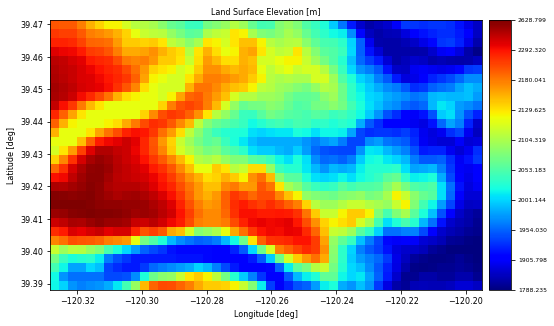

In [87]:
from topoflow.utils import visualize as tfvis
# from topoflow.utils import rts_files

a = 2
long_name = 'Land Surface Elevation'
rtg_filename = new_DEM_file
stretch = 'hist_equal'

tfvis.read_and_show_rtg( rtg_filename, long_name, rtg_type=grid_info.data_type,
                         ### BLACK_ZERO=False,
                         cmap='jet', stretch=stretch, a=a, VERBOSE=True,
                         xsize=10, ysize=10, dpi=None)

## Compute the D8 Flow Direction Grid  <a id="d8_flow_B"></a>

TopoFlow includes a component called <b>d8_global</b> that can compute a grid of D8 flow direction codes (Jenson 1984 convention), as well as several additional, related grids such as a grid of total contributing area (TCA).  TopoFlow components are configured through the use of configuration files, which are text files with the extension ".cfg".  Therefore, we now need to make use of the CFG file for the D8-Global component, <i>Test1_d8_global.cfg</i>.

In [88]:
os.chdir( topo_dir )
d8 = d8_global.d8_component()
d8.DEBUG = False

#------------------------------------------------------------------------
# NOTE:  We already filled the pits in the DEM, but the FILL_PITS_IN_ZO
#        toggle in Test1_d8_global.cfg is set to 1 by default.
#        This causes fill_pits to be called again in d8.initialize().
#------------------------------------------------------------------------
cfg_file = cfg_dir + case_prefix + '_d8_global.cfg'  # (need full path here)
time = 0.0
d8.initialize( cfg_file=cfg_file, SILENT=False, REPORT=True )

# If elevation <= nodata, set D8 flow code to 0 (undefined)
if (DRAINS_TO_OCEAN):
    d8.DEM_nodata = 0.0
else:
    d8.DEM_nodata = -9999.0

d8.update( time, REPORT=True )

rti_file = site_prefix + '.rti'
grid_info = rti_files.read_info( rti_file, REPORT=True )

d8_code_file = site_prefix + '_flow.rtg'
rtg_files.write_grid(d8.d8_grid, d8_code_file, grid_info, RTG_type='BYTE')

D8 component: Initializing...
Reading config file into component state.
    min(dx), max(dx) = 239.03355, 239.30894 [m]
    min(dy), max(dy) = 308.39694, 308.4012 [m]
    min(dd), max(dd) = 390.19016, 390.35553 [m]
    min(da), max(da) = 73718.24095493647, 73802.14425160647 [m^2]
Reading grid values...
Finished reading grid from:
  /Users/peckhams/basins/Sagehen/__topo/Sagehen_DEM.rtg
   min(DEM), max(DEM) = 1788.235 2628.7993

Filling pits in initial DEM...
Number of nodata and NaN values = 0
Finished initializing "closed" array.
 
Putting boundary pixels on heap...
Number of pixels on heap = 152
Finished with heap insertion.
 
n_closed = 0 of 1440
Total pixels   = 1440
Raised  pixels = 0
Drained pixels = 1442
Run time for fill_pits() =     0.0359 [seconds]
Finished with fill_pits().
 
Imported netCDF4 version: 1.5.3
D8 component: Updating...
Updating D8 flow grid...
   update_d8_codes(): Initializing grid...
   --------------------------------------------
   Data type of flow grid at

## Save the D8 Total Contributing Area (TCA) Grid  <a id="d8_area_B"></a>

In [89]:
os.chdir( topo_dir )
d8_area_file = site_prefix + '_d8-area.rtg'
rtg_files.write_grid( d8.A, d8_area_file, grid_info, RTG_type='FLOAT', SILENT=False)

Writing grid values...
Finished writing grid to:
    Sagehen_d8-area.rtg


## Visualize the D8 Area Grid

Reading grid values....
Finished reading grid from:
  Sagehen_d8-area.rtg
Byte swap needed = False
Reading grid from RTG file...
extent = [-120.3283, -120.194966666667, 39.388066666667, 39.4714]
min(grid), max(grid) = 0.0 37.027317
Finished.



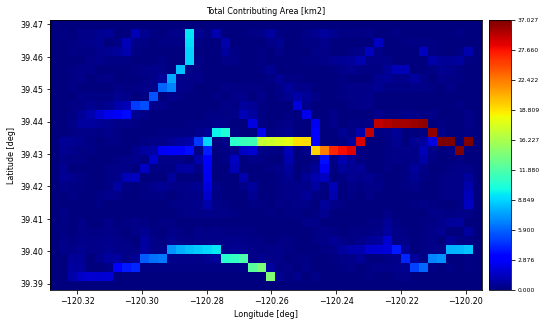

In [90]:
long_name = 'Total Contributing Area'
rtg_filename = d8_area_file
stretch = 'power3'
tfvis.read_and_show_rtg( rtg_filename, long_name, rtg_type='FLOAT',
                         ### BLACK_ZERO=False,
                         cmap='jet', stretch=stretch, a=a, VERBOSE=True,
                         xsize=10, ysize=10, dpi=None)

## Compute the D8 Slope Grid  <a id="d8_slope_B"></a>

In [91]:
print(topo_dir)
os.chdir( topo_dir )
d8_slope_file = site_prefix + '_slope.rtg'

#---------------------------------------------
# Method 1:  Standard D8, cell-to-cell slope
#---------------------------------------------
# os.chdir( topo_dir )
# d8.update_slope_grid()
# rtg_files.write_grid( d8.S, d8_slope_file, grid_info, RTG_type='FLOAT', SILENT=False)

#-----------------------------------------------------------------
# Method 2:  Better method for handling cells with slope of zero
#-----------------------------------------------------------------
# (Recommended)
os.chdir( topo_dir )
new_slopes.get_new_slope_grid(site_prefix=site_prefix, case_prefix=case_prefix,
                              cfg_dir=cfg_dir, slope_file=d8_slope_file)

/Users/peckhams/basins/Sagehen/__topo/
Computing slope grid...
dtype(d8.ds) = float32
   Initial min slope     = 0.0
   Initial min pos slope = 0.0002154139255787
   Initial max slope     = 0.5990417175461478

   Final min slope     = 0.0
   Final min pos slope = 0.0002154139255787
   Final max slope     = 0.5990417175461478
Finished writing new slope grid to file: 
/Users/peckhams/basins/Sagehen/__topo/Sagehen_slope.rtg

   n_reps        = 43
   min slope     = 0.0
   min pos slope = 0.0002154139255787
   max slope     = 0.5990417175461478
 


## Visualize the D8 Slope Grid

Reading grid values....
Finished reading grid from:
  Sagehen_slope.rtg
Byte swap needed = False
Reading grid from RTG file...
extent = [-120.3283, -120.194966666667, 39.388066666667, 39.4714]
min(grid), max(grid) = 0.0 0.5990417
Finished.



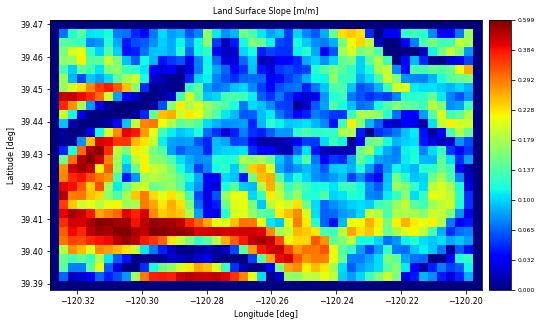

In [92]:
long_name = 'Land Surface Slope'
rtg_filename = d8_slope_file
stretch = 'tanh'
a = 2

tfvis.read_and_show_rtg( rtg_filename, long_name, rtg_type='FLOAT',
                         ### BLACK_ZERO=False,
                         cmap='jet', stretch='tanh', a=a, VERBOSE=True,
                         xsize=10, ysize=10, dpi=None)

## Compute the D8 Aspect Grid  <a id="d8_aspect_B"></a>

In [93]:
os.chdir( topo_dir )
d8.update_aspect_grid()
d8_aspect_file = site_prefix + '_aspect.rtg'
rtg_files.write_grid(d8.aspect, d8_aspect_file, grid_info, RTG_type='FLOAT', SILENT=False)

Writing grid values...
Finished writing grid to:
    Sagehen_aspect.rtg


## Visualize the D8 Aspect Grid

Reading grid values....
Finished reading grid from:
  Sagehen_aspect.rtg
Byte swap needed = False
Reading grid from RTG file...
extent = [-120.3283, -120.194966666667, 39.388066666667, 39.4714]
min(grid), max(grid) = 0.0 5.497787
Finished.



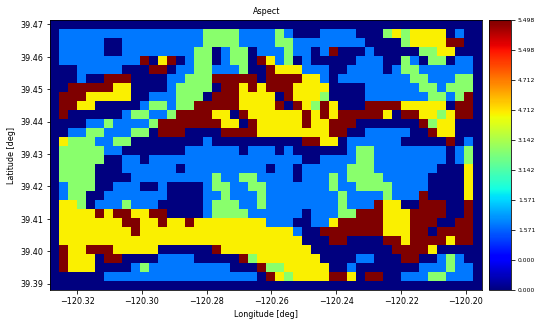

In [94]:
long_name = 'Aspect'
rtg_filename = d8_aspect_file
stretch = 'hist_equal'

tfvis.read_and_show_rtg( rtg_filename, long_name, rtg_type='FLOAT',
                         ### BLACK_ZERO=False,
                         cmap='jet', stretch=stretch, a=a, VERBOSE=True,
                         xsize=10, ysize=10, dpi=None)

## Compute the Estimated Channel Width Grid <a id="chan_width_B"></a>

First, use Google Maps or Google Earth to estimate the width of the river at the outlet to your river basin, in meters.  Here, we'll assume that width equals 140 meters.

The idea is to estimate the channel widths throughout the basin (as a grid with the same dimensions as the DEM), using an empirical power law of the form:  $w = c \, A^p$
where A is the total contributing area (TCA) that we computed as a grid above and saved into "d8_area_file".  A typical value of p is 0.5.  The value that w should have where A is maximum (e.g. the river outlet) is specified as g1. 

In [95]:
# Should be specified at the top of this notebook.
# max_river_width = 140.0  # [meters]
# channel_width_power = 0.5

os.chdir( topo_dir )
width_file = site_prefix + '_chan-w.rtg'
parameterize.get_grid_from_TCA(site_prefix=site_prefix, topo_dir=topo_dir,
             area_file=d8_area_file, out_file=width_file,
             g1=max_river_width, p=channel_width_power)

Power-law parameters are:
c = 1.7058318977885283
p = 0.5
Values set to 1.0 where A <= 0.
  This occurred at 160 grid cells.
grid min = 0.46316126
grid_max = 10.38
Finished writing file: 
/Users/peckhams/basins/Sagehen/__topo/Sagehen_chan-w.rtg



## Compute the Estimated "Manning's n" Grid  <a id="chan_manning_B"></a>

In order to compute grids of river flow velocity and discharge (volume flow rate), a very well-known, empirical formula known as <b>Manning's formula</b> (see Wikipedia) is the method used by default within TopoFlow.  This formula includes a parameter called <b>Manning's n</b>, that characterizes the roughness of the channel bed and resulting frictional loss of momentum.  Typical values in larger river channels range between 0.03 and 0.05.  Manning's formula can also be used for non-channelized, overland flow, but then a much larger value of 0.2 to 0.3 should be used.

The following code uses a power-law estimate of the form:  $n = c \, A^p$, where A is the total contributing area (TCA) grid, to create a grid of Manning's n values.  The value that n should have where A is maximum (e.g. the river outlet) is set as <b>g1</b>.  Similarly, the value that n should have where A is minimum (e.g. on a ridge) is set as <b>g2</b>.  The coefficient, c, and power, p, are then set to match these constraints.

In [96]:
# Should be specified at the top of this notebook.
# min_manning_n = 0.03
# max_manning_n = 0.2

os.chdir( topo_dir )
manning_file = site_prefix + '_chan-n.rtg'
parameterize.get_grid_from_TCA(site_prefix=site_prefix, topo_dir=topo_dir,
             area_file=d8_area_file, out_file=manning_file,
             g1=min_manning_n, g2=max_manning_n )

Power-law parameters are:
c = 0.0902803271389628
p = -0.3050462758776956
Values set to 1.0 where A <= 0.
  This occurred at 160 grid cells.
grid min = 0.029999996
grid_max = 1.0
Finished writing file: 
/Users/peckhams/basins/Sagehen/__topo/Sagehen_chan-n.rtg



## Compute the Estimated Channel Sinuosity Grid  <a id="chan_sinu_B"></a>

There are different definitions of channel sinuosity.  Here we are referring to the <b>absolute sinuosity</b>, defined as the ratio of the <b><i>along-channel flow distance</i></b> between the two endpoints of a channel and the <b><i>straight-line distance</i></b> between those endpoints.

By this definition, sinuosity is <b>dimensionless</b> \[km/km\], with a minimum possible value of 1.0.  It tends to increase slowly from 1 where TCA is small to a larger value where TCA is big, but typically does not exceed 1.3.

The following code uses a power-law estimate of the form:  $s = c \, A^p$, where A is the total contributing area (TCA) grid, to create a grid of sinuosity values.  The value that s should have where A is maximum (e.g. the river outlet) is set as <b>g1</b>.  Similarly, the value that n should have where A is minimum (e.g. near a ridge) is set as <b>g2</b>.  The coefficient, c, and power, p, are then set to match these constraints.

In [97]:
# Should be specified at the top of this notebook.
# max_sinuosity = 1.3

os.chdir( topo_dir )
min_sinuosity = 1.0  # (BY DEFINITION.  DO NOT CHANGE.)

sinu_file = site_prefix + '_sinu.rtg'
parameterize.get_grid_from_TCA(site_prefix=site_prefix, topo_dir=topo_dir,
             area_file=d8_area_file, out_file=sinu_file,
             g1=max_sinuosity, g2=min_sinuosity )

Power-law parameters are:
c = 1.0794387375809282
p = 0.029316285925671252
Values set to 1.0 where A <= 0.
  This occurred at 160 grid cells.
grid min = 1.0
grid_max = 1.1999999
Finished writing file: 
/Users/peckhams/basins/Sagehen/__topo/Sagehen_sinu.rtg



## Compute the Estimated Bankfull Depth Grid  <a id="bankfull_d_B"></a>

The <b>bankfull depth</b> is the maximum in-channel water depth of a river at a given location.  (It varies throughout a river basin.)  When the depth of water in a river exceeds this depth, <b>overbank flow</b> occurs and water enters the flood plain adjacent to the channel. <b>Overbank flow depth</b>, <b>inundation depth</b> or simply <b>flooding depth</b> are terms that refer to the depth of water on land outside of the river channel.  It is important to know the bankfull depth in order to more accurately predict the flooding depth. 

While remote sensing images can be used to estimate a river's bankfull width, the river bed typically cannot be "seen" through the water.  Moreover, bankfull depth is typically only measured at a few locations (e.g. at gauging stations) within a river basin, so accurate values of bankfull depth are difficult to obtain.

The following code uses a power-law estimate of the form:  $d_b = c \, A^p$, where A is the total contributing area (TCA) grid, to create a grid of bankfull depth values.  The value that $d_b$ should have where A is maximum (e.g. the river outlet) is set as <b>g1</b>.  A typical, empirical value for p is 0.4. The coefficient, c, is then set to match these constraints.

In [98]:
# Should be specified at the top of this notebook.
# max_bankfull_depth = 8.0  #### This must be determined from literature or data.
# bankfull_depth_power = 0.4

os.chdir( topo_dir )
dbank_file = site_prefix + '_d-bank.rtg'
parameterize.get_grid_from_TCA(site_prefix=site_prefix, topo_dir=topo_dir,
        area_file=d8_area_file,  out_file=dbank_file,
        g1=max_bankfull_depth, p=bankfull_depth_power )

Power-law parameters are:
c = 0.1438536670201776
p = 0.4
Values set to 1.0 where A <= 0.
  This occurred at 160 grid cells.
grid min = 0.050694134
grid_max = 1.0
Finished writing file: 
/Users/peckhams/basins/Sagehen/__topo/Sagehen_d-bank.rtg



## Compute the Estimated Initial Channel Water Depth Grid  <a id="init_depth_B"></a>

Here we attempt to estimate the initial depth of water for every channel in the river network.  This is supposed to be the "normal depth" of the river that is maintained by baseflow from groundwater (i.e. due to the groundwater table intersecting the channel bed) and is not attributed to a recent rainfall event.  This is the starting or initial condition for a model run.

This routine uses a <b>grid-based Newton-Raphson</b> iterative scheme to solve a transcendental equation (see Wikipedia) for the initial depth of water in a channel network that results from groundwater baseflow.  The variables involved are:

w = bed bottom width, trapezoid [m]<br>
A = upstream area [$km^2$]<br>
S = downstream slope [m/m]<br>
n = Manning roughness parameter  [$s/m^{1/3}$]<br>
$\theta$ = bank angle [degrees]<br>
d = water depth in channel [m]<br>
$A_c$ = wetted cross-section area [$m^2$]<br>
P  = wetted cross-section perimeter [m]<br>
$R_h = (A_c / P)$ = hydraulic radius [m]<br>
B = spatially-uniform baseflow volume flux [$m s^{-1}$]<br>

The equations used here are: <br>
$Q = v \, A_c = B \,A$    [$m^3 s^{-1}$] (steady-state) <br>
$v = (1/n) \, {R_h}^{2/3} \, S^{1/2} \,\,\,$  [SI units] <br>
$R_h = A_c / P$ <br>
$A_c = d \, [w + (d \, \tan(\theta))]$ <br>
$P = w + [2 \, d \, / \cos(\theta)]$ <br>

Note that B can be estimated from a baseflow discharge measured at the basin outlet.

If we are given w, n, theta, A, S and B, then we get an equation for d that cannot be solved in closed form.  However, we can write the equation $v \, A_c = B \, A$ in the form needed to solve for d (in every grid cell) by Newton's method, i.e.:
$F(d) = [v(d) \, A_c(d)] - (B \, A) = 0$.

In [99]:
# Should be specified at the top of this notebook.
# A_out_km2 = 23567.7  # TCA at basin outlet of Baro River (at Gambella)  [km2]
# Qbase_out= 40.0      # estimated baseflow discharge at basin outlet [m^3 / s]

os.chdir( topo_dir )
B_mps = init_depth.get_baseflow_volume_flux( A_out_km2, Qbase_out, REPORT=True)

d0_file = site_prefix + '_d0.rtg'
init_depth.compute_initial_depth( site_prefix=site_prefix, topo_dir=topo_dir,
           SILENT=False, baseflow_rate=B_mps, bank_angle=bank_angle,
           # angle_file=angle_file,
           area_file=d8_area_file, slope_file=d8_slope_file,
           width_file=width_file, manning_file=manning_file,
           sinu_file=sinu_file, d0_file=d0_file)

Baseflow volume flux = 1.4708651040195802e-06 [m s-1]
Baseflow volume flux = 5.295114374470489 [mm h-1]
size(slope) = 1440
size(wb) = 160
-------------------------------------------------
         Replacing them with smallest slope.
         Use "Profile smoothing tool" instead.
         min(slope) = 0.00021541392
         max(slope) = 0.5990417
-------------------------------------------------
 
Iterating...
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1440
Pixels left = 1423
Pixels left = 1385
Pixels left = 1366
Pixels left = 1319
Pixels left = 1216
Pixels left = 936
Pixels left = 301
Pixels left = 160
Pixels left = 160
Pixels left = 0
Finished writing file: 
/Users/peckhams/basins/Sagehen/__topo/Sagehen_d0.rtg
d_min = 0.0006527226759138755 [m]
d_max = 

## Create Soil Hydraulic Property Grids (via Pedotransfer) <a id="soil_hydro_B"></a>

Here, we first read a set of ISRIC <b>soil property</b> grids for each of 7 soil layers (see above) in GeoTIFF format.  We then <b>clip</b> them to a chosen geographic bounding box and <b>resample</b> (or regrid) them to a new spatial resolution (grid cell size).  (Typically, we regrid to the TopoFlow model grid.)  Finally, we use
[<b>pedotransfer functions</b>](https://en.wikipedia.org/wiki/Pedotransfer_function)
(Wosten et al., 1998, 2001 ) to compute a corresponding set of <b>soil hydraulic property</b> grids that are used to compute infiltration. (This uses <b>pedotransfer.py</b> in topoflow/utils.  These grids are referenced in the CFG files for the TopoFlow infiltration components.  The REPORT flag can be set to True to see more detailed information about each of the soil property grids.  Any warnings or errors are printed regardless.  In some cases, out-of-range values are generated and by default are forced into the valid range (from above or below).  Spurious values can cause the infiltration model to become [<b>numerically unstable</b>](https://en.wikipedia.org/wiki/Numerical_stability).

Files in the <b>src_soil_dir</b> folder span the entire country of Ethiopia and were downloaded from the
[<b>ISRIC SoilGrids website</b>](https://soilgrids.org/).  ISRIC SoilGrids provides <b>global</b> coverage at two different spatial resolutions:  250m and 1km.  (The products actually use Geographic coordinates and resolutions are 7.5 and 30 arcseconds.  The north-south dimension of grid cells therefore varies with latitude, being roughly 250m or 1km at the equator, but smaller at other latitudes.)
They contain soil property variables for each of 7 soil layers, as follows.

```
Variables:
BLDFIE = Bulk density [kg / m3]
BDRICM = Absolute depth to bedrock [cm]
CLYPPT = Mass fraction of clay [%]
ORCDRC = Soil organic carbon content (fine earth fraction)  [g / kg]
SLTPPT = Mass fraction of silt [%]
SNDPPT = Mass fraction of sand [%]

Layer 1 = sl1 = 0.00 to 0.05 m   (0  to  5 cm)
Layer 2 = sl2 = 0.05 to 0.15 m   (5  to 15 cm)
Layer 3 = sl3 = 0.15 to 0.30 m   (15 to 30 cm)
Layer 4 = sl4 = 0.30 to 0.60 m   (30 to 60 cm)
Layer 5 = sl5 = 0.60 to 1.00 m   (60 to 100 cm)
Layer 6 = sl6 = 1.00 to 2.00 m   (100 to 200 cm)
Layer 7 = sl7 = 2.00 to ??   m   (200 to ??? cm)
```

#### ISRIC Data Citation

Hengl T, Mendes de Jesus J, Heuvelink GBM, Ruiperez Gonzalez M, Kilibarda M, Blagotić A, et al. (2017) SoilGrids250m: Global gridded soil information based on machine learning. PLoS ONE 12(2): e0169748. doi:10.1371/journal.pone.0169748

In [35]:
# Copy RTI file from topo to soil directory
topo_rti_file = topo_dir + site_prefix + '.rti'
soil_rti_file = soil_dir + site_prefix + '.rti'
shutil.copyfile( topo_rti_file, soil_rti_file )

pedotransfer.save_soil_hydraulic_vars( site_prefix=site_prefix,
         in_dir=src_soil_dir, out_dir=soil_dir,
         out_bounds=out_bounds, REPORT=False,
         out_xres_sec=out_xres_sec, out_yres_sec=out_yres_sec,
         RESAMPLE_ALGO='bilinear')


Finished transforming ISRIC soil grid files.
   Number of grids = 37
   Number outside of model domain = 0

WARNING in read_soil_grid_files:
   Some values in C grid are out of range.
   Replacing invalid values with mid-range values.
   min(C)        = 6.0
   min(C >= 0)   = 6.0
   max(C <= 100) = 100.0
   max(C)        = 255.0

WARNING in read_soil_grid_files:
   Some values in S grid are out of range.
   Replacing invalid values with mid-range values.
   min(S)        = 14.0
   min(S >= 0)   = 14.0
   max(S <= 100) = 100.0
   max(S)        = 255.0

WARNING in read_soil_grid_files:
   Some values in OC grid are out of range.
   Replacing invalid values with mid-range values.
   min(OC)         = -32768.0
   min(OC >= 0)    = 0.0
   max(OC <= 1000) = 176.0
   max(OC)         = 176.0

WARNING in read_soil_grid_files:
   Some values in D grid are out of range.
   Replacing invalid values with mid-range values.
   min(D)          = -32768.0
   min(D >= 0)     = 14.0
   max(D <= 2650)  =

## Create a Space-time Total Precip. Rate Grid Stack  <a id="TotPrecip_B"></a>

<b>Note:</b> This capability has been delegated to the MINT data transformation team, since
downloading all of the required files can take hours to days.

However, assuming all required files have already been downloaded to your computer it can also be performed using TopoFlow's <b>regrid</b> utility.  The specific functions for this are called:
<b>create_rts_from_nc_files()</b> and <b>create_rts_from_chirps_files()</b>.

For the [<b>MINT Project</b>](http://mint-project.info/), we have experimented
with three different
<b>global</b>, remote-sensing based products for rainfall, called:
<b>GPM</b>, <b>GLDAS</b> and <b>CHIRPS</b>.

[<b>Version 06 of the GPM GPM IMERG Final Precipitation L3 </b>](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHH_06/summary?keywords=GPM)
has a spatial resolution of <b>0.1 x 0.1 degrees</b> (360 x 360 arcseconds)
and a temporal resolution of <b>30 minutes</b> (1800 seconds). 
This data is available for dates between: <b>2000-06-01</b> and <b>2020-01-31</b>.
This is the highest spatial and temporal resolution available for GPM data.

[<b>Version 2.1 of the GLDAS Noah Land Surface Model L4</b>](https://disc.gsfc.nasa.gov/datasets/GLDAS_NOAH025_3H_2.1/summary?keywords=GLDAS)
has a spatial resolution of <b>0.25 x 0.25 degrees</b> (900 x 900 arcseconds)
and a temporal resolution of <b>3 hours</b> (180 minutes).
This data is available for dates between: <b>2000-01-01</b> and <b>2020-02-29</b>.
This is the highest spatial and temporal resolution available for GLDAS data.

[<b>Version 2.0 of the UCSB CHIRPS Rainfall Product</b>](https://data.chc.ucsb.edu/products/CHIRPS-2.0/).
CHIRPS data (Climate Hazards Group InfraRed Precipitation with Station) is
available for various spatial and temporal resolutions as well as regions.
Here we use the Africa 6-hourly data set, which
has a spatial resolution of <b>0.1 x 0.1 degrees</b> (360 x 360 arcseconds)
and a temporal resolution of <b>6 hours</b> (21600 seconds). 
This data is available for dates between: <b>1981-01</b> and <b>2021-05</b>.
(Note: Dates beyond 2015-12 are in the extra_step folder.)
See the document README-CHIRPS.txt for more info.
The FTP site is:
(ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CHIRPS-2.0/).

In addition to space-time rainfall rates, some of the TopoFlow components can make use of other meteorological variables such as:  air temperature, soil temperature, relative humidity, surface wind speed, shortware radiation and longwave radiation.  The procedure for preparing these other space-time datasets for use in TopoFlow is very similar to what is done for precipitation.


In [7]:
from topoflow.utils import rti_files
rti_file    = topo_dir + site_prefix + '.rti'
grid_info   = rti_files.read_info( rti_file )  # needed for DEM ncols & nrows
from topoflow.utils import regrid

In [101]:
if (CHIRPS or CHIRPS2):
    resample_algo = 'bilinear'
    ## resample_algo = 'nearest'
    time_interval_hours = 6.0    # For the 6-hourly rainfall product
    non_negative = True          # zero out any negative values (e.g. nodata)

    os.chdir( src_rain_dir )
    regrid.create_rts_from_chirps_files( rts_file=rain_rts_path,
           time_interval_hours=time_interval_hours,
           resample_algo=resample_algo, NON_NEGATIVE=non_negative,
           VERBOSE=False, DEM_bounds=out_bounds,
           DEM_xres_sec=out_xres_sec, DEM_yres_sec=out_yres_sec,
           DEM_ncols=grid_info.ncols, DEM_nrows=grid_info.nrows )


## Create Space-time Grid Stacks for GLDAS Noah-LSM Variables <a id="GLDAS_vars_B"></a>

The GLDAS Noah-LSM L4 data set provides numerous variables, both meteorological and computed.
In order to use the next cell, you must first register for an EarthData account, then go to:
https://disc.gsfc.nasa.gov/datasets/GLDAS_NOAH025_3H_2.1/summary?keywords=GLDAS
and click on the "Subset / Get Data" link on the right-hand side. <br>
1. Set the Download Method to: Get File Subsets using the GES DISC Subsetter
2. Set the Date Range to:  2016-10-01 to 2017-09-30 <br>
3. Set Refine Region to:  -120.5, 39.25, -120, 39.75 <br>
4. For Select Variables, choose all the variables listed in next cell. <br>
5. For Regrid:  Keep Original Grid <br>
6. For File Format, choose:  netCDF <br>
Follow the instructions to download the files by various methods (e.g. wget, curl, AWS S3, etc.)

<b>Some other GLDAS vars:</b> <br>
Qg_tavg    = Ground heat flux (W m-2) <br>
Qh_tavg    = Sensible heat flux (W m-2) <br>
Qle_tavg   = Latent heat flux (W m-2) <br>
Qs_acc     = Storm surface runoff (kg m-2 per 3-hours) <br>
Qsb_ac     = Baseflow-groundwater runoff (kg m-2 per 3 hours) <br> 
Qsm_acc    = Snow melt (kg m-2 per 3-hour) <br>
Snowf_tavg = Snow precipitation rate (kg m-2 s-1) <br>
SWE_inst   = Snow depth water equivalent (kg m-2) <br>
<br>
"_tavg" vars are backward 3-hour avg. <br>
"_acc" vars are backward 3-hour accum. <br>
"_inst" vars are instantaneous. <br>
"_f" vars are forcing vars. <br>


In [8]:
if (GLDAS):
    NC4 = True
    resample_algo = 'bilinear'
    ## resample_algo = 'nearest'
    time_interval_hours = 3.0   # for reference; not used

    # Only process Total Precip.
    var_info = [
    ['Rainf_f_tavg', 'TotPrecip'] ]  # Total precipitation rate [kg m-2 s-1]

    # var_info = [
    # ['Albedo_inst', 'Albedo'] ]  # Surface albedo [%]
        
    # Process several key variables (comment out unneeded vars)
    #var_info = [
    #['Rainf_f_tavg',   'TotPrecip'],   # Total precipitation rate [kg m-2 s-1]
    #['Rainf_tavg',     'RainRate'],    # Rain precipitation rate [kg m-2 s-1]
    #['Tair_f_inst',    'Tair'],        # Air temperature [K, convert to C]
    #['AvgSurfT_inst',  'Tsurf'],       # Surface temperature [K convert to C]
    #['SnowDepth_inst', 'HSnow'],       # Snow depth [m]
    #['Wind_f_inst',    'WindSpeed'],   # Wind speed [m/s]
    #['Lwnet_tavg',     'LWnet'],       # Net longwave radiation flux [W m-2]
    #['Swnet_tavg',     'SWnet'],       # Net shortwave radiation flux [W m-2]
    #['Albedo_inst',    'Albedo'],      # Surface albedo [%]
    #['Psurf_f_inst',   'Psurf'],       # Surface pressure [Pa]
    #['Qair_f_inst',    'SpecHumid'] ]  # Specific humidity [kg kg-1]

    os.chdir( src_rain_dir )
    for k in range( len(var_info) ):
        var_name = var_info[k][0]
        prefix   = 'GLDAS_' + var_info[k][1] + '_'
        rts_file = prefix + site_prefix + extension
        rts_path = met_dir + rts_file
        regrid.create_rts_from_nc_files( rts_file=rts_path, NC4=NC4,
            var_name=var_name,
            GPM=GPM, VERBOSE=False, DEM_bounds=out_bounds,
            DEM_xres_sec=out_xres_sec, DEM_yres_sec=out_yres_sec,
            DEM_ncols=grid_info.ncols, DEM_nrows=grid_info.nrows,
            resample_algo=resample_algo)


Working...
Opening netCDF file...
Reading grid of values...
grid: min = 9.47 , max = 11.07
grid.shape = (2, 2)
grid.dtype = float32
grid nodata = -9999.0
nodata count = 0

count = 1
grid1: min   = 9.47 max = 11.07
grid1.shape  = (2, 2)
grid1.dtype  = float32
grid1 nodata = -9999.0 (in original nc_file)
grid1 # data = 4
 
comparing bounds...
regridding to DEM grid...
grid2: min  = 9.617864 max = 10.21677
grid2.shape = (30, 48)
grid2.dtype = float32
Converting units: % to [0,1]...
count = 1
Opening netCDF file...
Reading grid of values...
grid: min = 9.47 , max = 11.07
grid.shape = (2, 2)
grid.dtype = float32
grid nodata = -9999.0
nodata count = 0

count = 2
grid1: min   = 9.47 max = 11.07
grid1.shape  = (2, 2)
grid1.dtype  = float32
grid1 nodata = -9999.0 (in original nc_file)
grid1 # data = 4
 
comparing bounds...
regridding to DEM grid...
grid2: min  = 9.617864 max = 10.21677
grid2.shape = (30, 48)
grid2.dtype = float32
Converting units: % to [0,1]...
count = 2
Opening netCDF file...


## Create Space-time Grid Stack for Relative Humidity <a id="RH_B"></a>

GLDAS provides <b>specific humidity</b>, but not <b>relative humidity</b>.
However, it is possible to compute <b>relative humidity</b> as a function
of specific humidity, air temperature (T_air), and surface pressure (p0).
Given RTS file grid stacks for these 3 vars, this section computes a new
RTS file for <b>relative humidity</b>.


In [14]:
import numpy as np
from topoflow.utils import rts_files
from topoflow.utils import met_utils as mu

if (GLDAS):
    # Do the needed files exist?
    q_air_file  = met_dir + 'GLDAS_SpecHumid_' + site_prefix + extension
    T_air_file  = met_dir + 'GLDAS_Tair_'      + site_prefix + extension
    P_surf_file = met_dir + 'GLDAS_Psurf_'     + site_prefix + extension
    
    HAVE_Q_AIR  = os.path.exists( q_air_file )
    HAVE_T_AIR  = os.path.exists( T_air_file )
    HAVE_P_SURF = os.path.exists( P_surf_file )  # P_surf = p0
    
    if (HAVE_Q_AIR and HAVE_T_AIR and HAVE_P_SURF):
        rts_q_air  = rts_files.rts_file()
        rts_T_air  = rts_files.rts_file()
        rts_P_surf = rts_files.rts_file()
 
        rts_q_air.open_file( q_air_file )
        rts_T_air.open_file( T_air_file )
        rts_P_surf.open_file( P_surf_file )
 
        RH_file = met_dir + 'GLDAS_RH_' + site_prefix + extension
        rts_RH  = rts_files.rts_file()   # For new RTS file
        OK = rts_RH.open_new_file( RH_file, info=grid_info, var_name='RH' )
        # OK = open_new_file(self, file_name, info=None,
        #                  var_name='UNKNOWN', dtype='float32',
        #                  VERBOSE=False, OVERWRITE_OK=False,
        #                  MAKE_RTI=True, MAKE_BOV=False):
        method = 'BRUTSAERT'  # (or 'SATTERLUND', or 'BOLTON')
        n_grids = rts_q_air.number_of_grids()
    
        print('Creating RTS Grid Stack for RH...')
        for time_index in range(n_grids):
            q_air  = rts_q_air.read_grid(  time_index, dtype='float32' )
            T_air  = rts_T_air.read_grid(  time_index, dtype='float32' )
            P_surf = rts_P_surf.read_grid( time_index, dtype='float32' )
   
            # print('time_index =', time_index)
            # print('q_air  min, max =', q_air.min(),  ', ', q_air.max() )
            # print('T_air  min, max =', T_air.min(),  ', ', T_air.max() ) 
            # print('P_surf min, max =', P_surf.min(), ', ', P_surf.max() )
            # print()

            # Compute RH via met_utils.py. RH in [0,1]
            RH = mu.relative_humidity( q_air, T_air, P_surf, method=method)
            RH = np.float32( RH )
            rts_RH.add_grid( RH )

        rts_q_air.close_file()
        rts_T_air.close_file()
        rts_P_surf.close_file()
        rts_RH.close_file()
        print('Finished creating RTS Grid Stack for RH.')
        print()
    else:
        print('ERROR:  Could not find the required grids for:')
        print('        Q_air, T_air and P_surf.')
        print()


Creating RTS Grid Stack for RH...
Finished creating RTS Grid Stack for RH.



## Convert Units of an Existing Space-time Grid Stack <a id="convert_units_B"></a>

The rts_files.py module contains a <b>convert_units</b> method that can be used to convert the measurement units for an RTS file.


In [8]:
from topoflow.utils import rts_files

T_air_file   = met_dir + 'GLDAS_Tair_'  + site_prefix + extension
T_air_K_file = met_dir + 'GLDAS_TairK_' + site_prefix + extension

old_rts = rts_files.rts_file()
OK = old_rts.open_file( T_air_file )

# Celsius to Kelvin:  Add 273.15.
old_rts.convert_units( T_air_K_file, add_val=273.15 )
old_rts.close_file()


Creating new RTS file:
   /Users/peckhams/basins/Sagehen/__met/GLDAS_TairK_Sagehen_2016-10_to_2017-09.rts
from existing RTS file:
   /Users/peckhams/basins/Sagehen/__met/GLDAS_Tair_Sagehen_2016-10_to_2017-09.rts
Converting units: 
   factor  = 1
   add_val = 273.15
Finished.


In [10]:
from topoflow.utils import rts_files

P_surf_file  = met_dir + 'GLDAS_Psurf_'  + site_prefix + extension  # [Pa]
P_surf2_file = met_dir + 'GLDAS_Psurf2_' + site_prefix + extension  # [mbar]

old_rts = rts_files.rts_file()
OK = old_rts.open_file( P_surf_file )

# Pascals to Millibars:  Divide by 100 (Multiply by 0.01)
old_rts.convert_units( P_surf2_file, factor=0.01 )
old_rts.close_file()


Creating new RTS file:
   /Users/peckhams/basins/Sagehen/__met/GLDAS_Psurf2_Sagehen_2016-10_to_2017-09.rts
from existing RTS file:
   /Users/peckhams/basins/Sagehen/__met/GLDAS_Psurf_Sagehen_2016-10_to_2017-09.rts
Converting units: 
   factor  = 0.01
   add_val = 0
Finished.


### Other Things to Try

The following are markdown cells to illustrate the use of other functions in TopoFlow's regrid utility.

``` python
# Try to open one of the GPM files
src_rain_dir = '/Users/peckhams/TF_Data/GPM_Rain_Globe_2014_ISSUES?/'
nc_rain_directory = src_rain_dir + '2014-08'
os.chdir( nc_rain_directory )
# var_name = 'precipitationCal'  ## Not present
var_name = 'HQprecipitation'
nc_file = '3B-HHR-E.MS.MRG.3IMERG.20140801-S000000-E002959.0000.V06B.HDF5.nc4'
(ds_in, grid, nodata) = regrid.gdal_open_nc_file( nc_file, var_name, VERBOSE=True)
ds_in = None  # (close the file)
```

``` python
# Try to open one of the GPM files in a different set
nc_rain_directory = '/Users/peckhams/TF_Data/GPM_Rain_2014-08_Ethiopia/'
os.chdir( nc_rain_directory )
var_name = 'precipitationCal'
nc_file = '3B-HHR.MS.MRG.3IMERG.20140801-S000000-E002959.0000.V06B.HDF5.nc4'
(ds_in, grid, nodata) = regrid.gdal_open_nc_file( nc_file, var_name, VERBOSE=True)
ds_in = None  # (close the file)
```

``` python
# Convert one GPM file from netCDF to GeoTIFF
out_file = 'GPM_Conversion_Test.tif'
regrid.fix_gpm_file_as_geotiff( nc_file, var_name, out_file, 
                                out_nodata=None, VERBOSE=True)
```

### Experiment 1:  Rainfall RTS File for Lol-Kuru, South Sudan


<b>Note:</b> This is a markdown cell with code, for reference.

``` python
#--------------------------------------------
# DEM information for Lol-Kuru, South Sudan
#--------------------------------------------
DEM_xres_sec = 30.0
DEM_yres_sec = 30.0
DEM_ncols    = 483
DEM_nrows    = 364
minlat = 6.532916666667    # (south)
maxlat = 9.566250000000    # (north)
minlon = 23.995416666666   # (west)
maxlon = 28.020416666666   # (east)
DEM_bounds2 = [minlon, minlat, maxlon, maxlat]

# Note: These GPM rainfall files apparently contain some NaN values.
rts_file = met_dir + 'GPM_Rain_2014-08-Lol-Kuru.rts'
nc_rain_directory = met_dir + 'GPM_Files_2014-08_South_Sudan/'
NC4 = False
GPM = True
resample_algo = 'bilinear'
## resample_algo = 'nearest'

os.chdir( nc_rain_directory )
regrid.create_rts_from_nc_files( rts_file=rts_file, NC4=NC4,
           GPM=GPM, VERBOSE=False, DEM_bounds=DEM_bounds2,
           DEM_xres_sec=DEM_xres_sec, DEM_yres_sec=DEM_yres_sec,
           DEM_ncols=DEM_ncols, DEM_nrows=DEM_nrows,
           resample_algo=resample_algo)
```

### Experiment 2: Rainfall RTS File for Pongo, South Sudan

<b>Note:</b> This is a markdown cell with code, for reference.

``` python
#--------------------------------------------
# DEM information for "Pongo", South Sudan
#--------------------------------------------
DEM_xres_sec = 30.0
DEM_yres_sec = 30.0
DEM_ncols    = 396
DEM_nrows    = 428
DEM_bounds2 = [24.079583333333,  6.565416666666, 27.379583333333, 10.132083333333]
## DEM_bounds = [6.565416666666, 24.079583333333,  10.132083333333, 27.379583333333]

rts_file = met_dir + 'GPM_Rain_2014-08-Pongo.rts'
nc_rain_directory = met_dir + 'GPM_Files_2014-08_South_Sudan/'
NC4 = False
GPM = True
resample_algo = 'bilinear'
## resample_algo = 'nearest'

os.chdir( nc_rain_directory )
regrid.create_rts_from_nc_files( rts_file=rts_file, NC4=NC4,
           GPM=GPM, VERBOSE=False, DEM_bounds=DEM_bounds2,
           DEM_xres_sec=DEM_xres_sec, DEM_yres_sec=DEM_yres_sec,
           DEM_ncols=DEM_ncols, DEM_nrows=DEM_nrows,
           resample_algo=resample_algo)
```

## Appendix 1: &nbsp; Installing TopoFlow in a conda Environment  <a id="setup_B"></a>

To run this Jupyter notebook, it is recommended to use Python 3.7 from an Anaconda distribution and to install the required Python packages in a conda environment called <b>tf36</b>.  This prevents conflicts with other Python packages you may have installed.
The Anaconda distribution includes many packages from the
[<b>Python Standard Library</b>](https://docs.python.org/3/library/).

First, download the TopoFlow 3.6 package from GitHub repo "topoflow36" at:
<b>https://github.com/peckhams/topoflow36</b>.
Copy or unzip the package into some directory on your computer.  Let's refer to this full path as TF36_DIR.  e.g. TF36_DIR = /Users/peckhams/Dropbox/TopoFlow_3.6

Installing TopoFlow 3.6 with pip causes most of its dependencies to be installed automatically.  However, if you want to run the growing collection of Jupyter notebooks (such as this one) that highlight TopoFlow functionality, you will also need to install the
[<b>nb_conda</b>](https://docs.anaconda.com/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/) package, and optionally the <b>jupyterlab</b> package (see below).
In addition, some of the new TopoFlow utilities (e.g. regrid.py and visualize.py) require the
[<b>gdal</b>](https://pypi.org/project/GDAL/) and
[<b>matplotlib</b>](https://matplotlib.org/) packages.
Simply type the following commands at an OS prompt after installing Anaconda and downloading TopoFlow.

``` bash
% conda update -n base conda
% conda create --name tf36
% conda activate tf36
% conda list
% conda install nb_conda
% conda install gdal
% conda install matplotlib
% conda install imageio
% pip install imageio-ffmpeg  (an imageio extension)
% cd TF36_DIR
% pip install -e .   (-e is the editable/developer option)
```

<b>Note:</b>  The <b>pip</b> package manager is used to install TopoFlow 3.6, since it is not available as a conda package.  (It gets installed when you install <b>nb_conda</b>.) However, like conda, pip will install a package and its dependencies into the currently active conda environment, as explained
[<b>in these docs</b>](https://docs.conda.io/projects/conda/en/4.6.1/user-guide/tasks/manage-pkgs.html#installing-non-conda-packages).  If you switch to another environment with <b>conda activate envname</b>, you can confirm that topoflow (or cfunits, gdal, netcdf4, etc.) is not there with <b>conda list</b>. 

<b>Note:</b>  Some of the new TopoFlow utilities use a Python package version of [<b>GDAL</b>](https://pypi.org/project/GDAL/).  At the time of this writing, installing <b>gdal</b> from the <b>conda-forge </b> with <i>conda install -c conda-forge gdal</i> did not work.

<b>Note:</b> The netCDF4 package will be installed as a TopoFlow dependency.

#### <b>Conda Environments</b>

Note that <b>conda</b> is the name of the package manager for the popular Anaconda Python distribution.  One feature of conda is support for multiple environments, which are isolated from one another.  When you install Anaconda, an environment called <b>base</b> is created for you and a base set of commonly-used Python packages are installed there.  However, you can (and should!) create additional, named environments and install different sets of Python packages into them without worrying about potential conflicts with packages in other environments.  Type <b>conda env list</b> to list your available environments.  You can switch to one of your other environments using the command <b>conda activate envname</b>.  (Replace "envname" with the name of an environment.) You can switch back to the base environment with the command <b>conda deactivate</b>.  It is better not to install new packages into the base environment.  See the online conda documentation on [<b>Managing Environments</b>](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for more information.

It is always a good idea to update conda itself before creating new environments and installing packages in them. The "-n" flag is followed by the name of the environment to update, and the "-c" flag is followed by the name of the <b>channel</b> from which to get packages.  A channel is a collection of Python packages that are provided and maintained by some group.  The word "defaults" refers to
[<b>Anaconda's own collection</b>](https://docs.anaconda.com/anaconda/packages/pkg-docs/), while
[<b>conda-forge</b>](https://conda-forge.org/feedstocks/)
refers to another popular collection and the GitHub organization that maintains it.  Many Python packages are available from both of these channels.  (However, the ipyleaflet and pydap  packages are currently not available in the Anaconda collection.) When you are installing several packages into an environment, the potential for installation problems seems to be less if you get them all from the same channel.  Keep in mind that packages you install will likely depend on many other Python packages, so there is a potential for conflicts, usually related to different package versions.  Using conda environments helps to mitigate against this and helps with <b>reproducibility</b>.

Once you've switched to an environment with <b>conda activate envname</b>, you can type <b>conda list</b> to see a list of packages.  If you do this right after you create a new environment you will see that it contains no packages.  If you do this right after installing each package above you will see that:

<ul>
    <li>Installing <b>nb_conda</b> triggers installation of <b>nb_conda_kernels</b> (2.2.3),
        <b>ipykernel</b> (5.3.0), <b>notebook</b> (6.0.3), <b>pip</b> (20.0.2),
        <b>setuptools</b> (46.4.0) and <b>traitlets</b> (4.3.3), among many others.
    <li>Installing <b>gdal</b> triggers installation of #######.
    <li>Installing <b>matplotlib</b> triggers installation of ##########. 
</ul>

#### <b>Jupyter Notebook Extensions</b>

Note that <b>nb_conda</b> is installed first above, and triggers installation of <b>nb_conda_kernels</b> along with <b>notebook</b>.  This is important as it makes your Jupyter notebook app aware of your conda environments and available in the app as "kernels".  Anaconda provides a helpful page on the
[<b>Jupyter Notebook Extensions</b>](https://docs.continuum.io/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/).
That page also explains how you can enable or disable these extensions individually. The command <b>jupyter nbextension list</b> shows you the extensions that are installed and whether they are enabled.  If you run the <b>jupyter notebook</b> or <b>jupyter lab</b> command in an environment that has <b>nb_conda_kernels</b> installed (see below), you will have the ability to associate one of your available conda environments with any new notebook you create.  Different environments give rise to different <b>kernels</b> in Jupyter, and the kernel name includes the environment name, e.g. <b>Python \[conda env:tf36\]</b>.  The kernel name is displayed in the upper right corner.  Notebooks typically open with the "environment kernel" they were created with. However, there is a <b>Change Kernel</b> option in the <b>Kernel</b> menu in the Jupyter app menu bar. (After changing the kernel, you may need to choose <b>Restart</b> from the <b>Kernel</b> menu.

#### <b>Cloning a conda Environment</b>

If your notebook is working but then you want to import additional packages (possibly with many dependencies, and potential for problems), you can keep the first environment but clone it with
<b><i>conda create --name clonename --copy --clone envname</i></b>,
and then install the additional packages in the clone.  This way, you can switch to the new environment's kernel and try to run your notebook, but if you run into any problems you can easily revert back to the original environment and functionality.

<b>Note:</b> Setting the "--copy" flag installs all packages using copies instead of hard or soft links.  This is necessary to avoid problems when using <b>pip</b> together with <b>conda</b> as described [<b>on this page</b>](https://stackoverflow.com/questions/43879119/installing-tensorflow-in-cloned-conda-environment-breaks-conda-environment-it-wa).

#### <b>Running Notebooks in the Jupyter Notebook App</b>

When you want to run the notebook, type <b>conda activate tf36</b> (at an OS command prompt) to activate this environment.  Then change to the directory that contains this notebook and type <b>jupyter notebook</b>.  By default, this folder is called <b>Jupyter</b> and is in your home directory.  In the app, choose this notebook by name, "TopoFlow_Getting_Started.ipynb", and make sure to choose the kernel called:  <b>Python \[conda env:tf36\]</b>.  See the References section at the end for more info.

#### <b>Running Notebooks in the JupyterLab App</b>

The
[<b>JupyterLab</b>](https://jupyterlab.readthedocs.io/en/stable/index.html)
app is a cool, new successor to the Notebook app and offers many additional features.  If you want to use this notebook in JupyterLab, you need to install one more Python package, as follows.

``` bash
% conda activate tf36
% conda install -c conda-forge jupyterlab
```

You launch the JupyterLab app by typing <b>jupyter lab</b> instead of <b>jupyter notebook</b>.  To quit, choose <b>Logout</b> or <b>Shutdown</b> from the app's <b>File</b> menu.

#### <b>JupyterLab Extensions</b>

The Jupyter project provides documentation on
[<b>JupyterLab Extensions</b>](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)
which add capabilities to JupyterLab.  For example, after installing jupyterlab (see just above), if you want to use the <b>ipywidgets</b> and <b>ipyleaflet</b> Python packages, you need to install two extensions, as follows:
```
% conda activate tf36
% jupyter labextension install jupyter-leaflet
% jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
To list the jupyter labextensions you have, and to see whether or not they are enabled, type <b>jupyter labextension list</b>.  <b>Note:</b> If you start jupyterlab from a conda environment in which a given extension is not installed, and then open or switch to a notebook which uses a different "environment kernel", one that requires that extension, the notebook may not work.

You should only install trusted extensions, due to security concerns, as explained in the documentation.  Third-party extensions pose a potential security risk.  An extension that allows you to play MP4 movie files in JupyterLab is
[<b>available on GitHub</b>](https://github.com/jupyterlab/jupyterlab-mp4)
(by Ian Rose of the JupyterLab organization)
and can be installed with the command:
```
% jupyter labextension install @jupyterlab/mp4-extension
```
<b>Note:</b> This command is from a pull-request on the extension's github repo.
Using the command: "jupyter labextension install jupyterlab-mp4" results in the
following error message:<br>
An error occured.
ValueError: "jupyterlab-mp4" is not a valid npm package

As of May 27, 2020, JupyterLab has added an experimental <b>Extension Manager</b> which can be enabled by choosing Settings > Enable Extension Manager in the app.
